# Jorge Leonardo López Agredo
## cod: 2218061 
### Modelado Matemático II. Prof: David Sierra

En el presente Notebook se presentan los códigos básicos para poder ejecutar los **esquemas de diferencias finitas (EDF)** por el método de Euler implícito (B.E) y Euler explicito (F.E).

Los problemas a estudiar es:

# Condiciones de contorno Newmann no homogéneas, material  homogéneo.
$$\begin{cases}
\begin{matrix}
u_t-ku_{xx}=0\  \cr
u(0)=u_0\ \text{para} & u_0 \in \mathbb{R}\end{matrix} \cr
u_x(0)=g_1(t), \hspace{3mm}u_x(L)=g_2(t)
\end{cases}
$$


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
%matplotlib inline


In [2]:
def EulerTheta(M,N,theta=1):
    a= 0
    b= 1
    L= b-a# longitud de la barra (m)
    k=0.2 #difusividad térmica (m^2/s)
    

    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    #condición inicial y de frontera
    Tinic = lambda x : x*(L-x)
    Ta= lambda t : 0*t+0
    Tb= lambda t : 0*t+0
    T=Tinic(x)
    Tamp = np.zeros(m+1)
    Tamp[0] = Ta(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Tamp[-1] = Tb(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Tamp[1:-1] = T
    #paso en el tiempo
    if theta>=0.5 and theta<=1:
        dt = 0.1 #Definimos sin restricciones
    else:
        dt = h**2/(2*k*(1-2*theta))#Definimos bajo el máximo de la condición de Courant CFL
    #definiendo la matriz A
    lamb = k*dt/h**2
    A1=np.zeros(m-1)
    for i in range(m-1):
        if i == 0:
            A1[i]=1+theta*lamb
        elif i == m-2:
            A1[i]=1+theta*lamb 
        else:        
            A1[i]=1+2*theta*lamb
    A2= -theta*lamb*np.ones(m-2)
    A = diags([A1,A2,A2], [0,-1,1]).toarray()
    
    #definiendo la matriz B
    B1=np.zeros(m-1)
    for i in range(m-1):
        if i == 0:
            B1[i]=1-(1-theta)*lamb
        elif i == m-2:
            B1[i]=1-(1-theta)*lamb
        else:        
            B1[i]=1-2*(1-theta)*lamb
    B2= (1-theta)*lamb*np.ones(m-2)
    B = diags([B1,B2,B2], [0,-1,1]).toarray()
#    A=np.zeros((m-1,m-1))
#    for i in range(m-1):
#        if i == 0:
#            A[i,i]=1+theta*lamb
#        elif i == m-2:
#            A[i,i]=1+theta*lamb 
#        else:        
#            A[i,i]=1+2*theta*lamb       
#    for i in range(m-2):
#        A[i,i+1]=-theta*lamb
#        A[i+1,i]=-theta*lamb
#    
#       #definiendo la matriz B
#    B=np.zeros((m-1,m-1))
#    lamb = k*dt/h**2
#    for i in range(m-1):
#        if i == 0:
#            B[i,i] = 1-(1-theta)*lamb
#        elif i== m-2:
#            B[i,i] = 1-(1-theta)*lamb
#        else:
#            B[i,i]=1-2*(1-theta)*lamb    
#    for i in range(m-2):
#        B[i,i+1]=(1-theta)*lamb
#        B[i+1,i]=(1-theta)*lamb
    #graficando soluciones en cada paso de tiempo    
    plt.figure(figsize=(7,5))
    plt.plot(Xamp,Tamp, label = 'Temperatura inicial')
    tm=0
    for t in range(N):
        tm=tm+dt
        #definamos el vector b tal que, A*u_j = B*u_{j-1}+b
        b = np.zeros(m-1)
        b[0] = -h*(1-theta)*lamb*Ta(tm-dt)-h*theta*lamb*Ta(tm)
        b[-1] = h*(1-theta)*lamb*Tb(tm-dt)+h*theta*lamb*Tb(tm)
        T = np.dot(np.dot(np.linalg.inv(A),B),Tamp[1:-1])+np.dot(np.linalg.inv(A),b)
        Tamp[0] = T[0]-h*Ta(tm)#condiciones de frontera que varian con respecto al tiempo
        Tamp[-1] = T[-1]+h*Tb(tm)#condiciones de frontera que varian con respecto al tiempo
        Tamp[1:-1] = T
        plt.plot(Xamp,Tamp)
    plt.legend()
    plt.title(f'Método theta CC Newmann no Homogéneas')
    plt.show()



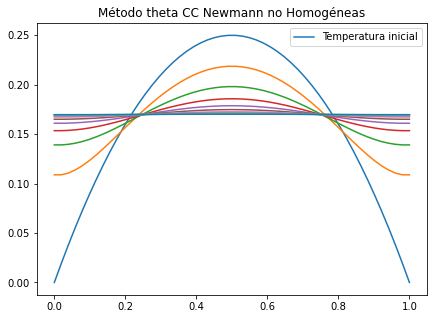

In [3]:
EulerTheta(50, 10,1)

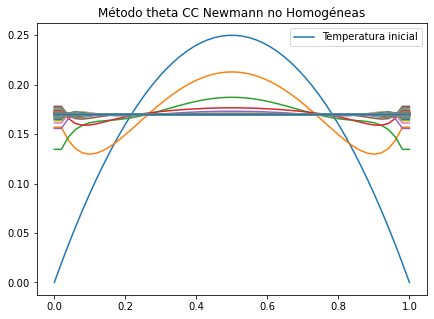

In [4]:
EulerTheta(50, 100,0.5)

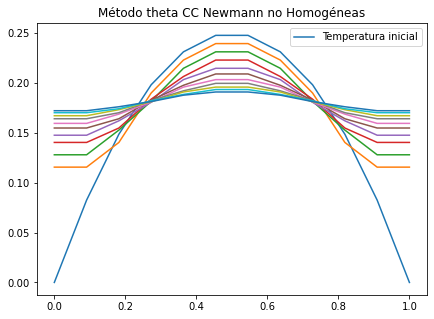

In [5]:
EulerTheta(10, 10,0.)

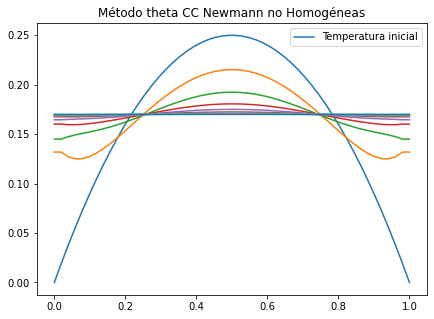

In [6]:
EulerTheta(50, 10,0.7)

# Veamos ahora el siguiente problema.

# Condiciones de contorno Newmann no homogéneas, material no homogéneo.
$$\begin{cases}
\begin{matrix}
u_t-(k(x)u_{x})_x=0\  \cr
u(0)=u_0\ \text{para} & u_0 \in \mathbb{R}\end{matrix} \cr
u(0)=g_1(t), \hspace{3mm}u(L)=g_2(t)
\end{cases}
$$

In [9]:
def PrbkVariable(M,N):
    a= 0
    b= 1
    L= b-a# longitud de la barra (m)
    #k = lambda x : 0.*x+0.2 #difusividad térmica (m^2/s)
    k = lambda x : 0.61*x+0.2 #difusividad térmica (m^2/s)


    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    X = np.linspace(a, b, 2*m+1)
    K = k(X)
    #condición inicial y de frontera
    Tinic = lambda x : x*(L-x)
    Ta= lambda t : 0.5*t+0.0
    Tb= lambda t : 0.*t+0.0
    T=Tinic(x)
    Tamp = np.zeros(m+1)
    Tamp[0] = Ta(0)
    Tamp[-1] = Tb(0)
    Tamp[1:-1] = T

    #paso en el tiempo
    dt = 0.1 #Definimos sin restricciones

    #definiendo la matriz A
    A1=np.zeros(m-1)
    for i in range(m-1):
        if i == 0:
            A1[i]=1+dt/h**2*(K[2*(i+1)+1]) 
        elif i == m-2:
            A1[i]=1+dt/h**2*(K[2*i+1])
        else:        
            A1[i]=1+dt/h**2*(K[2*i+1]+K[2*(i+1)+1])    

    A2=[-dt/h**2*K[2*(i+1)+1] for i in range(m-2)]
    A = diags([A1,A2,A2], [0,-1,1]).toarray()
    #graficando soluciones en cada paso de tiempo    
    plt.figure(figsize=(7,5))
    plt.plot(Xamp,Tamp, label = 'Temperatura inicial')
    tm=0
    for t in range(N):
        tm=tm+dt
        #definamos el vector b tal que, A*u_j = u_{j-1}+b(j)
        b = np.zeros(m-1)
        b[0] = -dt/h*(K[1]*Ta(tm))
        b[-1] = dt/h*(K[-2]*Tb(tm))
        T = np.dot(np.linalg.inv(A),Tamp[1:-1])+np.dot(np.linalg.inv(A),b)
        Tamp[0] = T[0]-h*Ta(tm)#condiciones de frontera que varian con respecto al tiempo
        Tamp[-1] = T[-1]+h*Tb(tm)#condiciones de frontera que varian con respecto al tiempo
        Tamp[1:-1] = T
        plt.plot(Xamp,Tamp)
    plt.legend()
    plt.title(f'Método Implícito CC no Homogéneas tipo Newmann')
    plt.show()



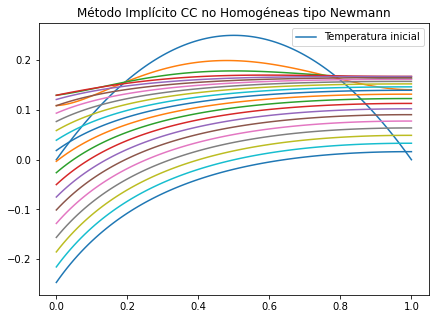

In [10]:
PrbkVariable(99,20)

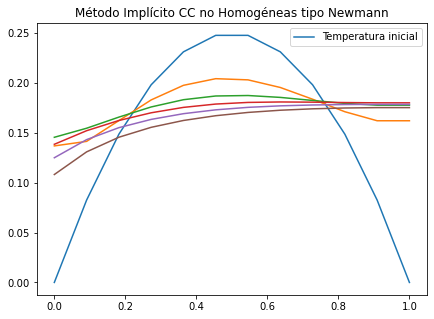

In [11]:
PrbkVariable(10,5)

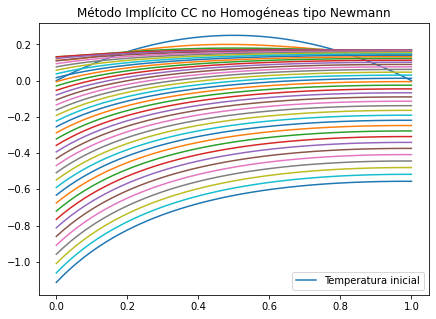

In [12]:
PrbkVariable(50,40)

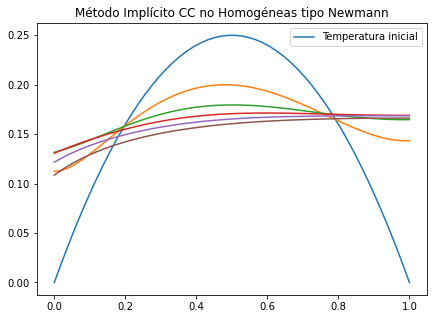

In [13]:
PrbkVariable(50,5)

In [5]:
a= 0
b= 1
L= b-a# longitud de la barra (m)
k = lambda x : 0.61*x+0.2 #difusividad térmica (m^2/s)
M=9

#Mallado
m=M+1
h=L/m
Xamp = np.linspace(a,b,m+1)
x = Xamp[1:-1]
X = np.linspace(a, b, 2*m+1)
K = k(X)
#condición inicial y de frontera
Tinic = lambda x : x*(L-x)
Ta= lambda t : 0.1*t+0.0
Tb= lambda t : 0.1*t+0.0
T=Tinic(x)
Tamp = np.zeros(m+1)
Tamp[0] = Ta(0)
Tamp[-1] = Tb(0)
Tamp[1:-1] = T

In [6]:
K

array([0.2   , 0.2305, 0.261 , 0.2915, 0.322 , 0.3525, 0.383 , 0.4135,
       0.444 , 0.4745, 0.505 , 0.5355, 0.566 , 0.5965, 0.627 , 0.6575,
       0.688 , 0.7185, 0.749 , 0.7795, 0.81  ])

In [7]:
K[-2]

0.7795000000000001

# Condiciones de contorno Newmann no homogéneas, material  homogéneo. 
# Segunda forma.
$$\begin{cases}
\begin{matrix}
u_t-ku_{xx}=0\  \cr
u(0)=u_0\ \text{para} & u_0 \in \mathbb{R}\end{matrix} \cr
u_x(0)=g_1(t), \hspace{3mm}u_x(L)=g_2(t)
\end{cases}
$$

En esta ocasión, vamos a estudiar la aproximación de las derivadas en la frontera mediante **diferencias centradas**, lo que nos da un mejor orden de convergencia, $\sigma(h^2)$.

In [18]:
def EulerImp(M,N):
    a= 0
    b= 1
    L= b-a# longitud de la barra (m)
    k=0.2 #difusividad térmica (m^2/s)
    

    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    #condición inicial y de frontera
    Tinic = lambda x : x*(L-x)
    Ta= lambda t : 0.1*t+0.0
    Tb= lambda t : 0.*t+0.0
    T=Tinic(x)
    Tamp = np.zeros(m+1)
    Tamp[0] = Ta(0)
    Tamp[-1] = Tb(0)
    Tamp[1:-1] = T
    
    #paso en el tiempo
    dt = 0.1 #Definimos sin restricciones
    
    #definiendo la matriz A
    lamb = k*dt/h**2
    A3 = (1+2*lamb)*np.ones(m+1)
    A1 = np.zeros(m)
    A2 = np.zeros(m)
    for i in range(m):
        if i==0:
            A1[i]=-2*lamb
            A2[i]=-lamb 
        elif i == m-1:
            A1[i]=-lamb
            A2[i]=-2*lamb
        else:
            A1[i]=-lamb
            A2[i]=-lamb
    A = diags([A3,A1,A2],[0,1,-1]).toarray()

#    A=np.zeros((m+1,m+1))
#    for i in range(m+1):
#        A[i,i]=1+2*lamb    
#    for i in range(m):
#        if i==0:
#            A[i,i+1]=-2*lamb
#            A[i+1,i]=-lamb 
#        elif i == m-1:
#            A[i,i+1]=-lamb
#            A[i+1,i]=-2*lamb
#        else:
#            A[i,i+1]=-lamb
#            A[i+1,i]=-lamb
    #graficando soluciones en cada paso de tiempo    
    plt.figure(figsize=(7,5))
    plt.plot(Xamp,Tamp, label = 'Temperatura inicial')
    tm=0
    for t in range(N):
        tm=tm+dt
        #definamos el vector b tal que, A*u_j = B*u_{j-1}+b
        b = np.zeros(m+1)
        b[0] = -2*h*lamb*Ta(tm)
        b[-1] = 2*h*lamb*Tb(tm)
        Tamp = np.dot(np.linalg.inv(A),Tamp)+np.dot(np.linalg.inv(A),b)
        plt.plot(Xamp,Tamp)
    plt.legend()
    plt.title(f'Método theta CC Newmann no Homogéneas')
    plt.show()



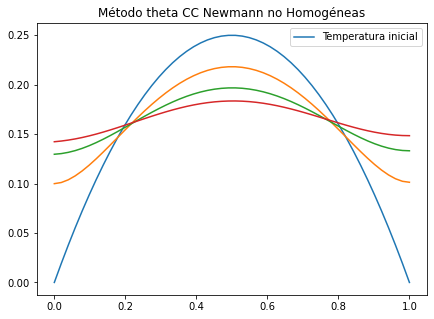

In [19]:
EulerImp(50,3)

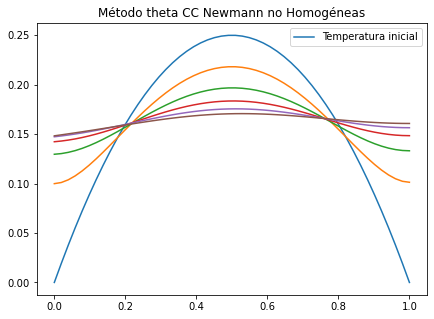

In [20]:
EulerImp(50,5)

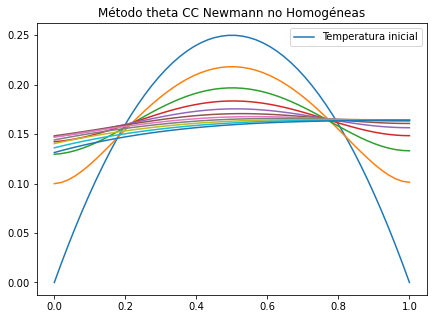

In [21]:
EulerImp(50,10)

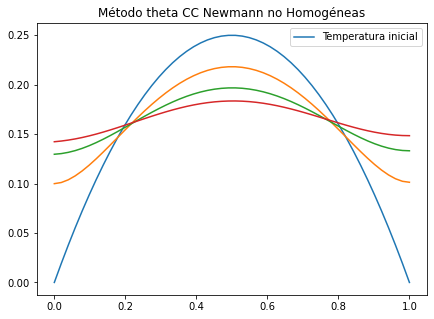

In [22]:
EulerImp(50,3)

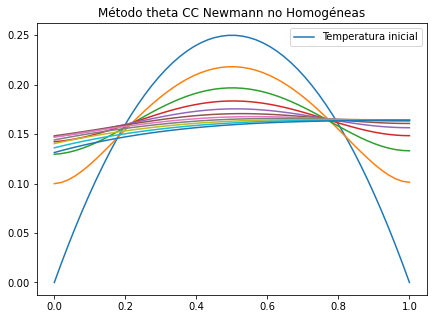

In [23]:
EulerImp(50,10)

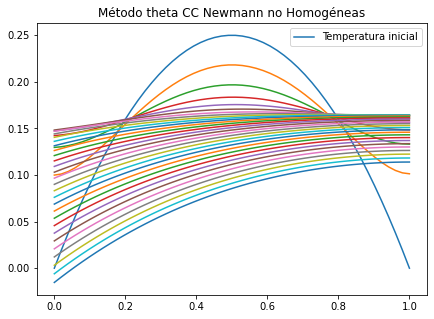

In [24]:
EulerImp(50,30)